<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Tarea Módulo 03

### Instrucciones

* Completa tus datos personales (nombre y rol USM) en siguiente celda.
* Debes _pushear_ tus cambios a tu repositorio personal del curso.
* Como respaldo, debes enviar un archivo .zip con el siguiente formato `mXX_homework_apellido_nombre.zip` a alonso.ogueda@gmail.com, debe contener todo lo necesario para que se ejecute correctamente cada celda, ya sea datos, imágenes, scripts, etc.
* Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

__Nombre__: IGNACIO JERIA MARRAS

__Rol__: 201684022-2

**Indicaciones**: Para el **Ejercicio 1** puedes utilizar tanto `matplotlib` como `altair` según te parezca más conveniente, en ambos casos cada gráfico debe tener elementos mínimos como:
- Título
- Nombre de los ejes en formato _amigable_, por ejemplo, si la columna del dataframe en cuestión tiene por nombre `cost_of_living_index` se espera que el eje del gráfico tenga por nombre `Índice de Costo de Vida`.
- Colores adecuados al tipo de datos.
- Un tamaño adecuado para ver con facilidad en una pantalla con resolución HD o FullHD.

Para el **Ejercicio 2** es obligación utilizar `altair`.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import ipywidgets as widgets

from vega_datasets import data
from ipywidgets import interactive, interact

pd.set_option('display.max_columns', 999)
alt.themes.enable('opaque')

%matplotlib inline

## 1. Índices de Costos de Vida

Estos índices están ajustados a la Ciudad de Nueva York (NYC). Lo que significa que para la Ciudad de Nueva York, cada índice debería marcar 100(%). Si otra ciudad tiene, por ejemplo, un índice de alquiler de 120, significa que en esa ciudad se paga de media por el alquiler un 20% más que en Nueva York. Si una ciudad tiene un índice de alquiler de 70, significa que en esa ciudad los alquileres son de media un 30% más baratos que en Nueva York.

* El Índice de Costo de Vida (Sin Alquiler) es un indicador relativo de los precios de bienes de consumo, incluyendo comestibles, restaurantes, transporte y servicios. El Índice de Costo de Vida no incluye gastos de residencia como alquileres o hipotecas. Si una ciudad tiene un Costo de Vida de 120, significa que Numbeo estima que es un 20% más cara que Nueva York (sin contar alquiler).

* El Índice de Alquiler es una estimación de precios de alquiler de apartamentos de una ciudad comparada con Nueva York. Si el Índice de Alquiler es 80, Numbeo estima que el precio de los alquileres en esa ciudad es de media un 20% más barato que en Nueva York.

* El Índice de Comestibles es una estimación de los precios de la compra de una ciudad en comparación con Nueva York. Para calcular esta sección, Numbeo utiliza el peso de los artículos en la sección "Mercados" por cada ciudad.

* El Índice de Restaurantes es una comparación de precios de comidas y bebidas en bares y restaurantes en comparación con NY.

* El Índice de Costo de Vida más Alquiler es una estimación de precios de consumo incluyendo alquiler en comparación con la Ciudad de Nueva York.

* El Poder Adquisitivo Local muestra la capacidad adquisitiva relativa a la hora de comprar bienes y servicios en una ciudad determinada, con relación al salario medio de la ciudad. Si el poder adquisitivo doméstico es 40, significa que los habitantes de dicha ciudad con salario medio pueden permitirse comprar una media de 60% menos bienes y servicios que los habitantes de Nueva York con salario medio. 

Para más información sobre los pesos utilizados (fórmula completa) puedes visitar: [motivación y metodología](https://es.numbeo.com/coste-de-vida/motivaci%C3%B3n-y-metodolog%C3%ADa).

Para comenzar es necesario instalar el paquete `lxml` en tu entorno virtual de conda para poder descargar los datos. Basta con ejecutar 

`conda install -n mat281 lxml`

O cambia `mat281` por el ambiente que estés utilizando.

Se disponibiliza a continuación la carga de datos de un dataframe.

In [2]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
life_cost = (
    pd.concat(
        {
            year: (
                pd.read_html(f"https://www.numbeo.com/cost-of-living/rankings.jsp?title={year}")[2]
                .rename(columns=lambda x: x.lower().replace(" ", "_"))
                .assign(rank=lambda x: x.index + 1)
                .set_index("rank")
            ) for year in years
        }
    )
    .rename_axis(["year", "rank"])
    .reset_index()
)
life_cost.head()

,year,rank,city,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
0,2015,1,"Hamilton, Bermuda",163.55,120.02,142.28,191.71,132.91,69.79
1,2015,2,"Geneva, Switzerland",145.18,81.46,114.05,161.14,141.23,130.21
2,2015,3,"Caracas, Venezuela",141.41,60.46,101.86,155.16,122.27,9.73
3,2015,4,"Zurich, Switzerland",141.06,66.39,104.57,148.56,146.90,133.91
4,2015,5,"Tromso, Norway",131.45,55.80,94.48,127.72,137.08,132.41


### Ejercicio 1.1 (5 pts)

Explique lo que se hizo en la celda anterior detalladamente.

Se crea una serie de de los años que se quieren tomar para el dataframe,luego usando al concatenar, enlazamos los años con los datos que se quieren extraer de internet (read_html), luego se editó el nombre de las columnas dejándolas en minúsculas y los espacios con guión bajo. Se crea rank para crear un tipo de index a las filas, partiendo por 1, luego con el for para cada año se le asignan ciertos valores. Con el reset index se reordena todo de nuevo con los nuevos valores y se deja con un ranking por año los costos de vida de cada ciudad.

### Ejercicio 1.2 (10 pts)

Genera un histograma del índice del costo de vida (sin alquiler) para cada año (es decir, 6 histogramas).

¿Qué conclusión puedes sacar de estos gráficos?

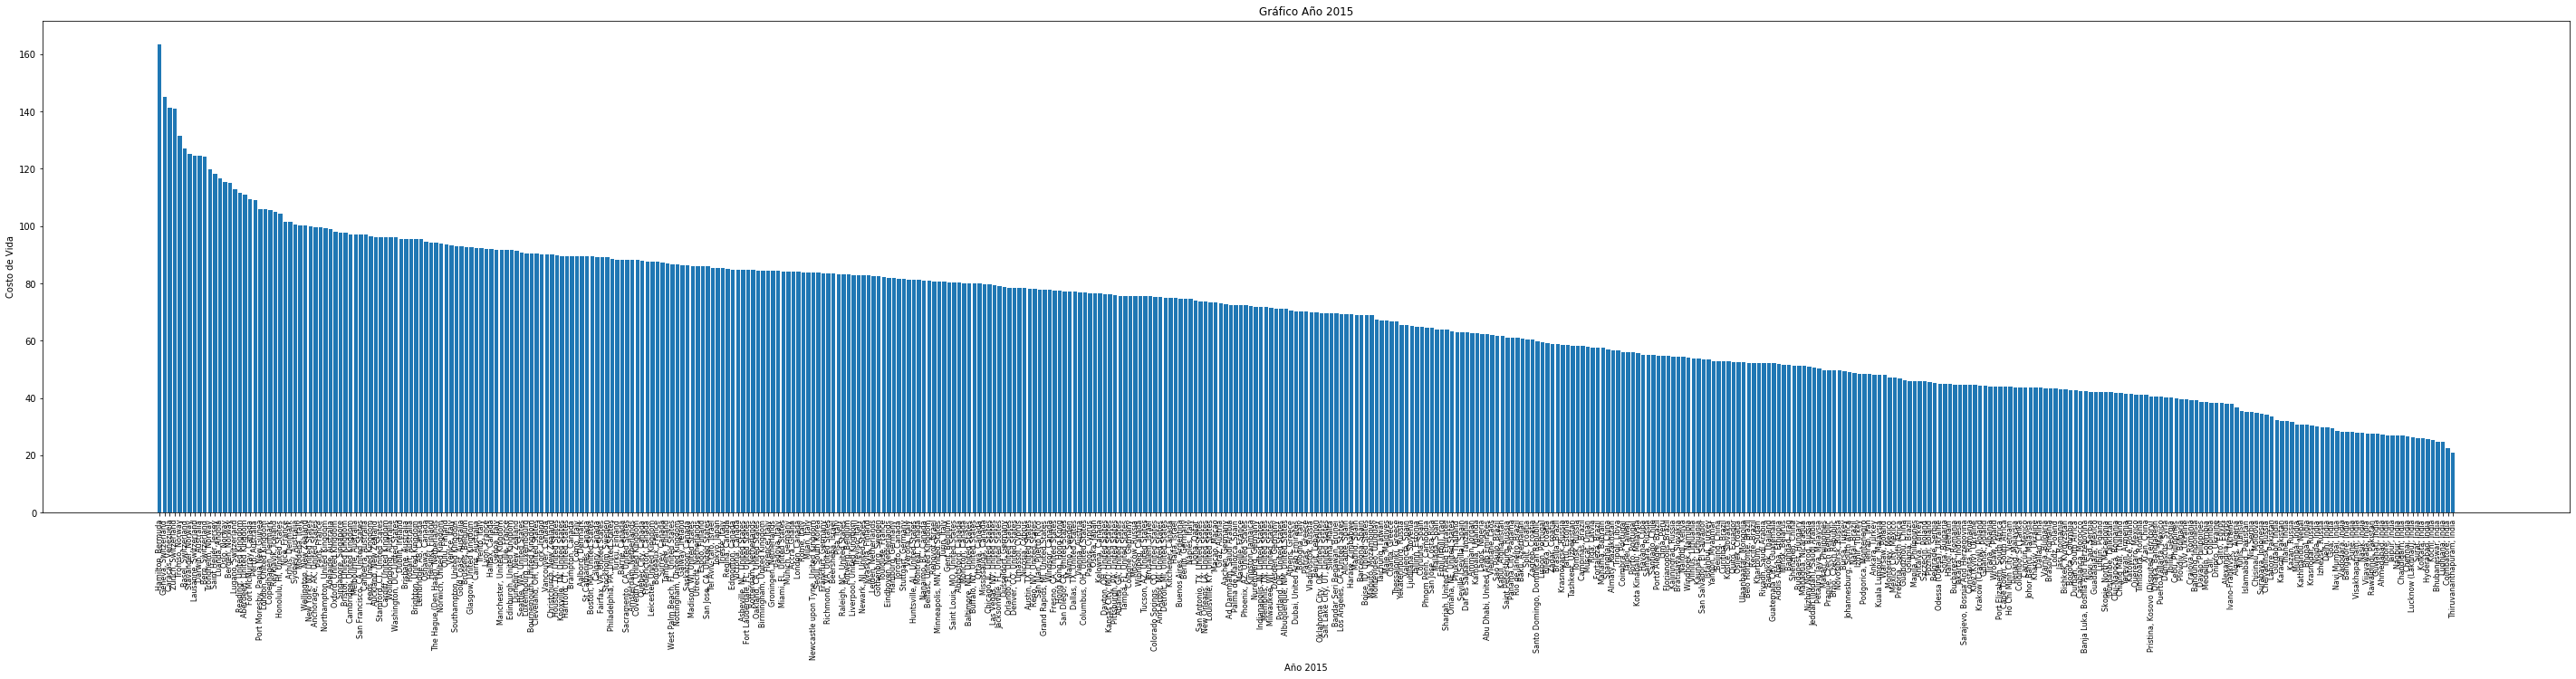

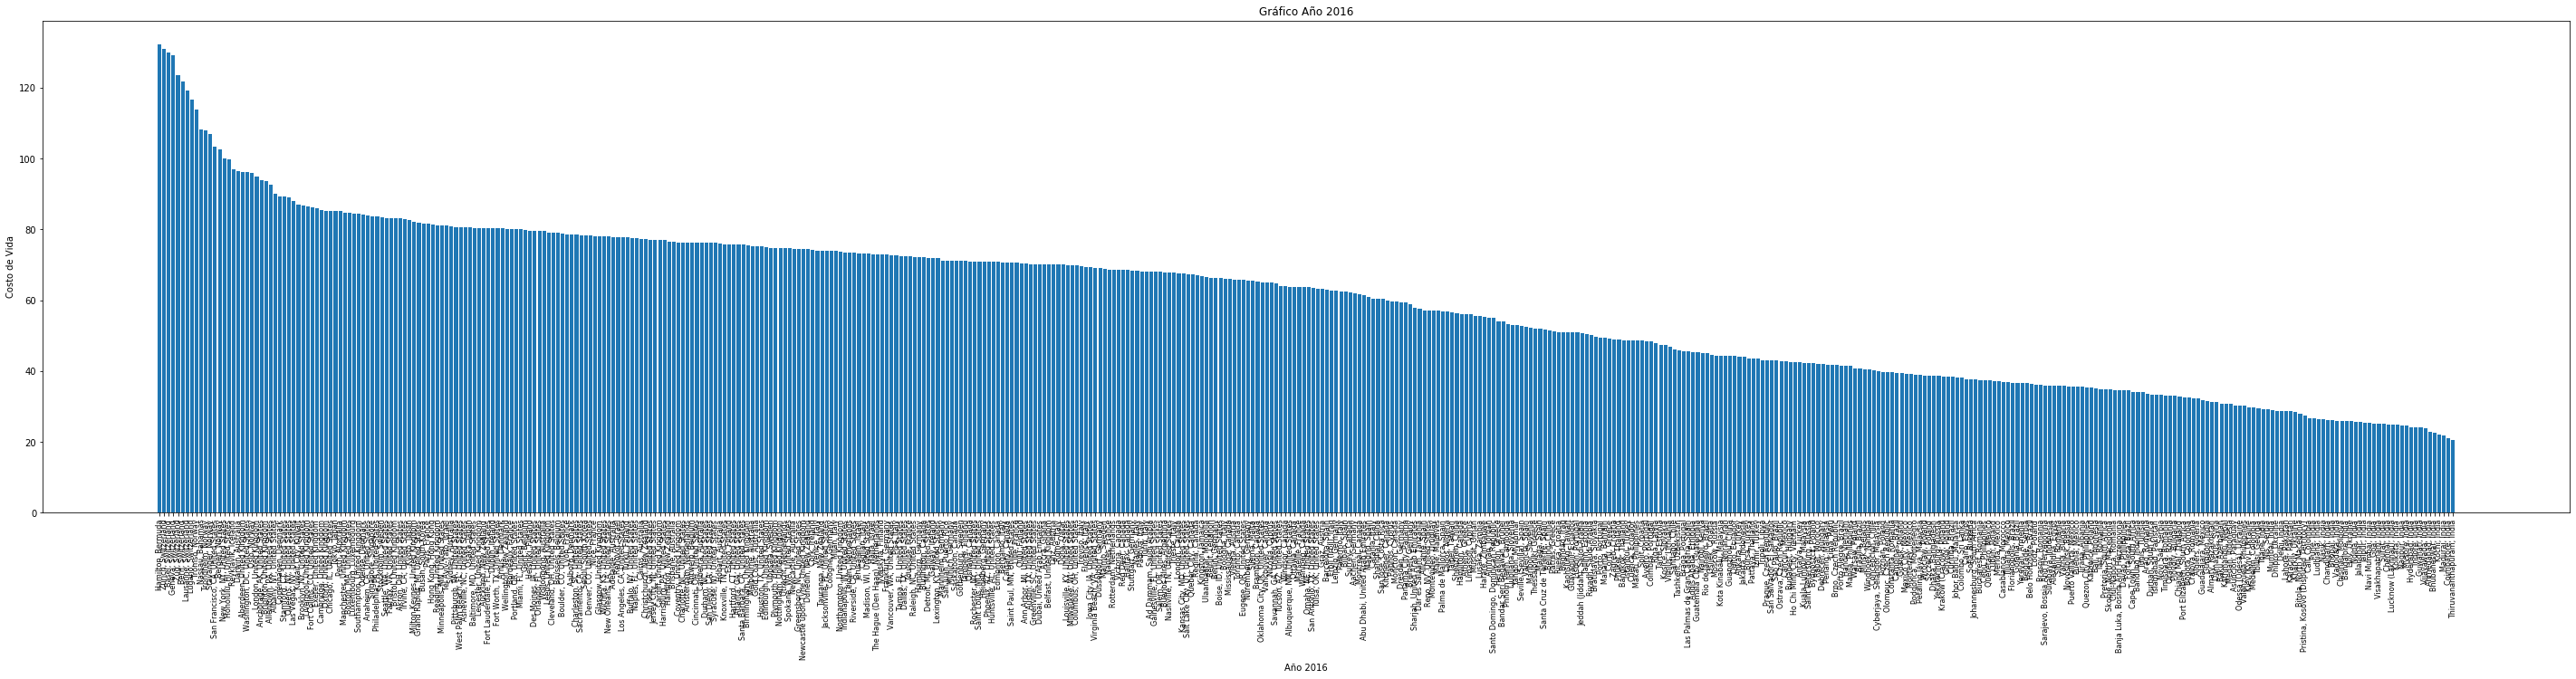

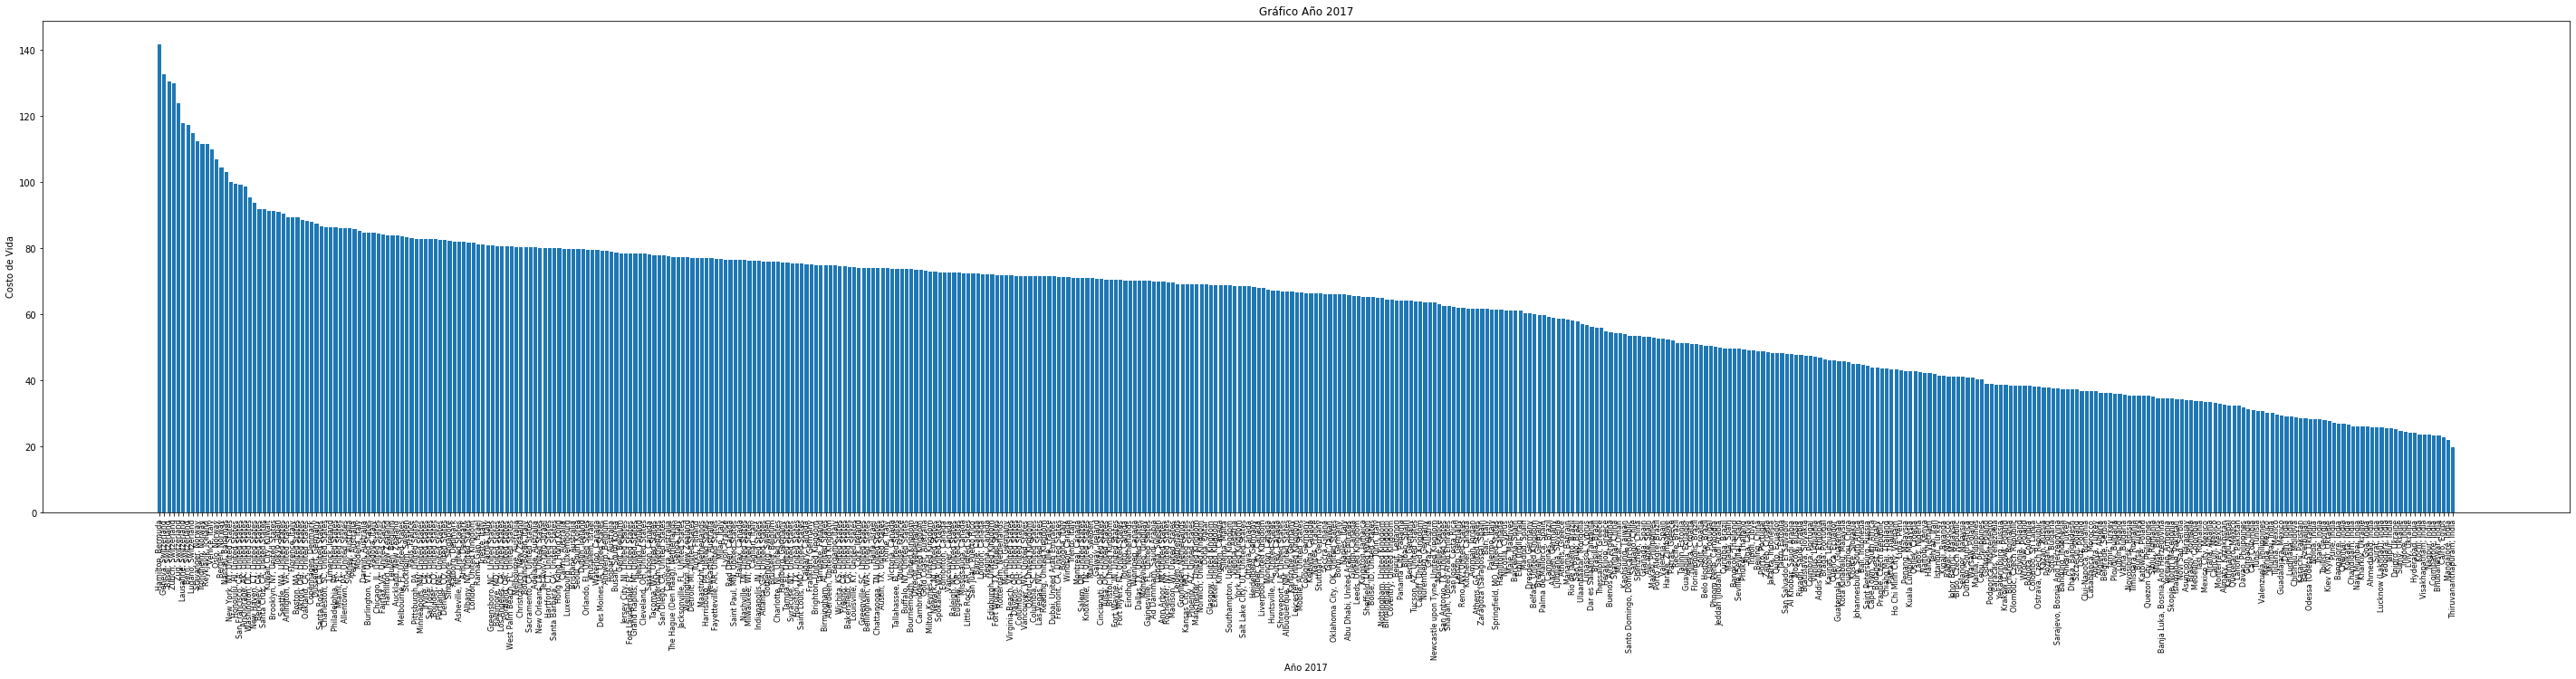

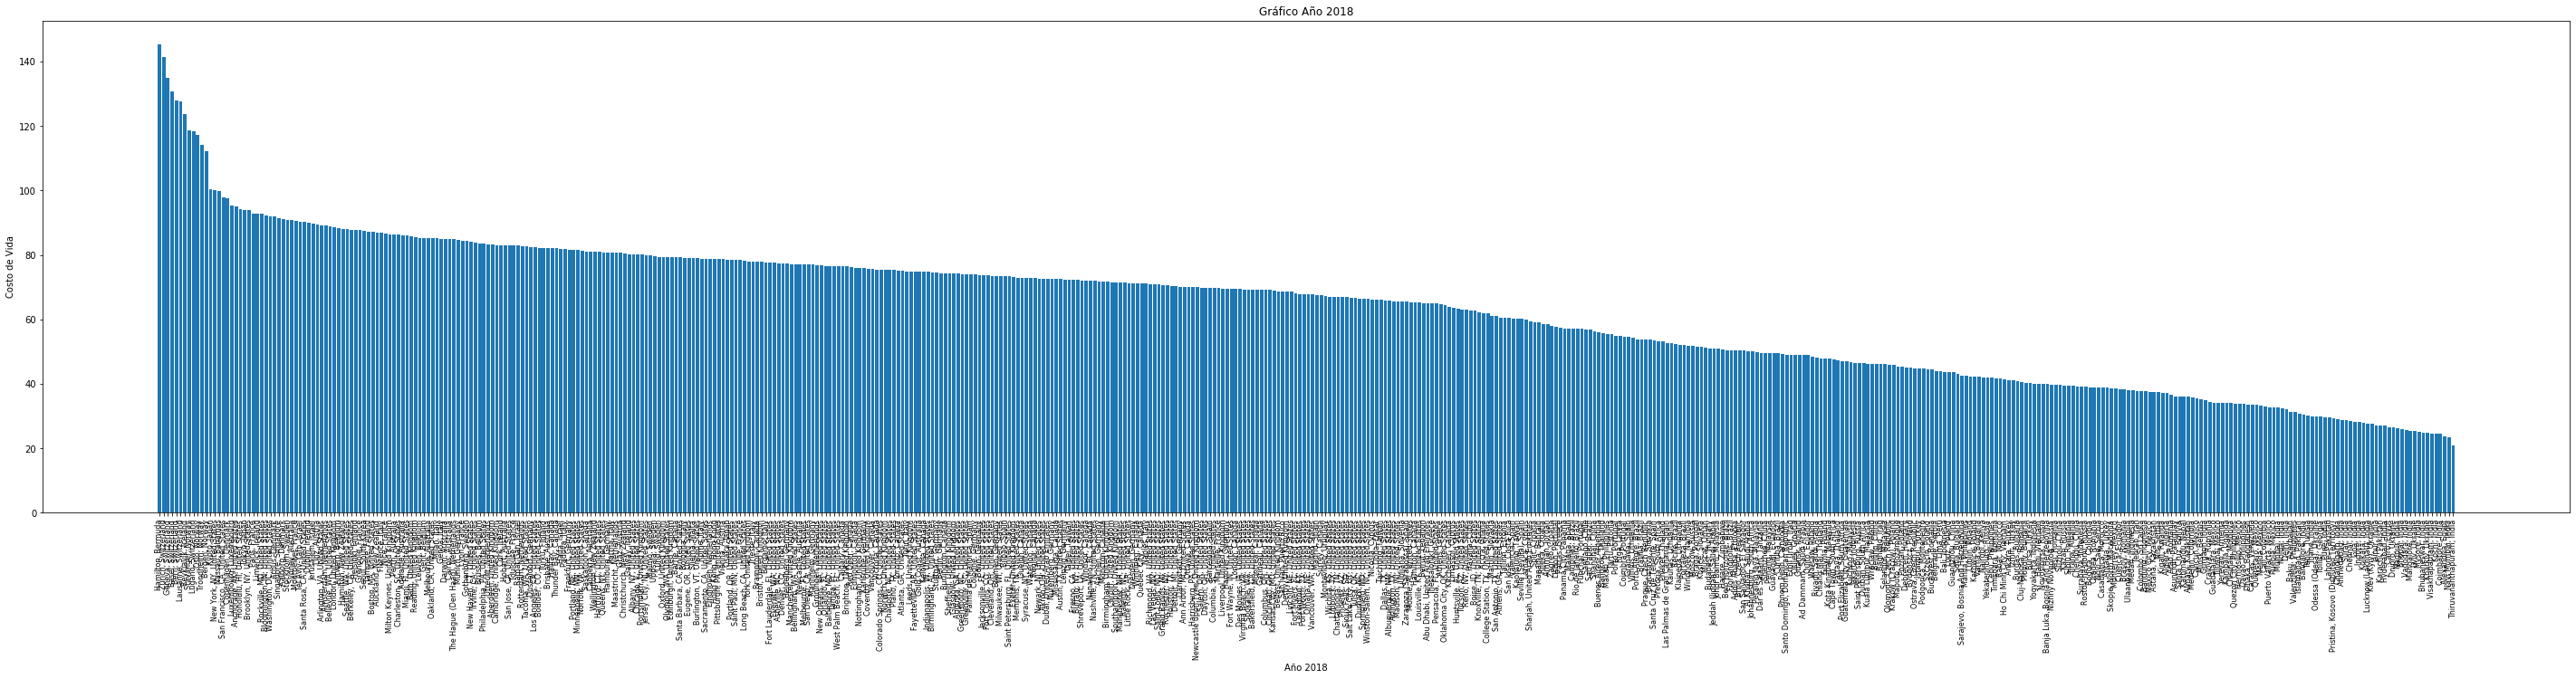

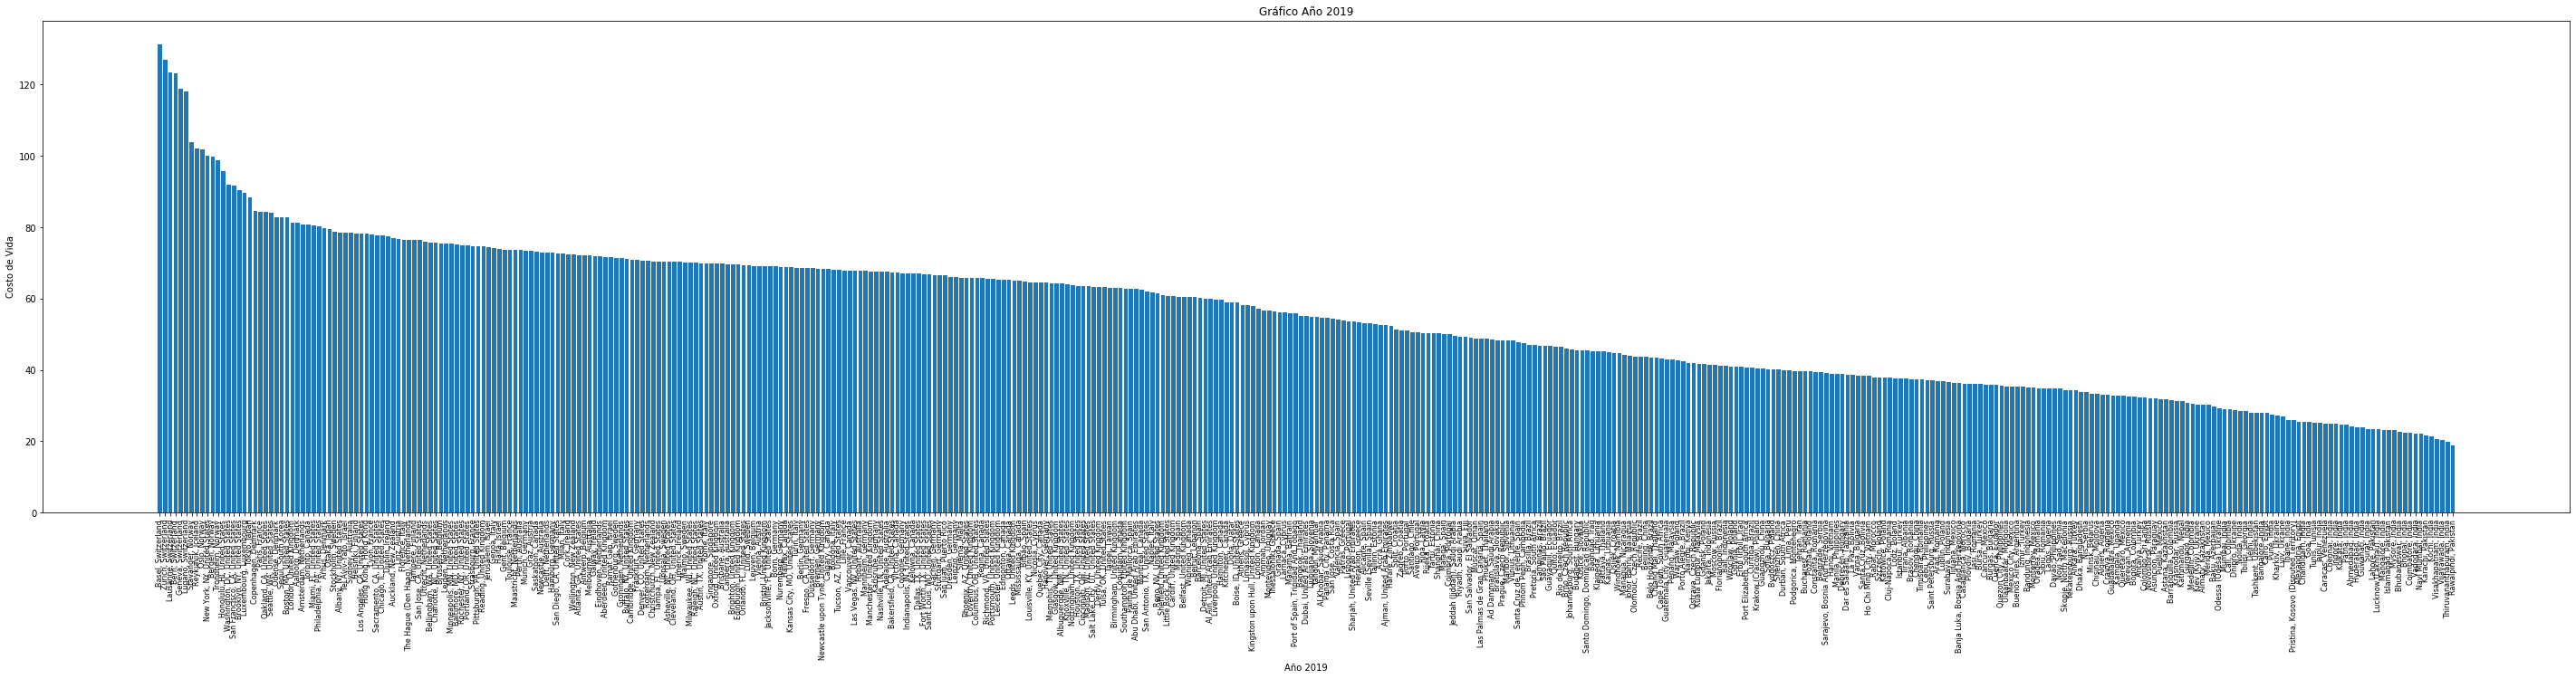

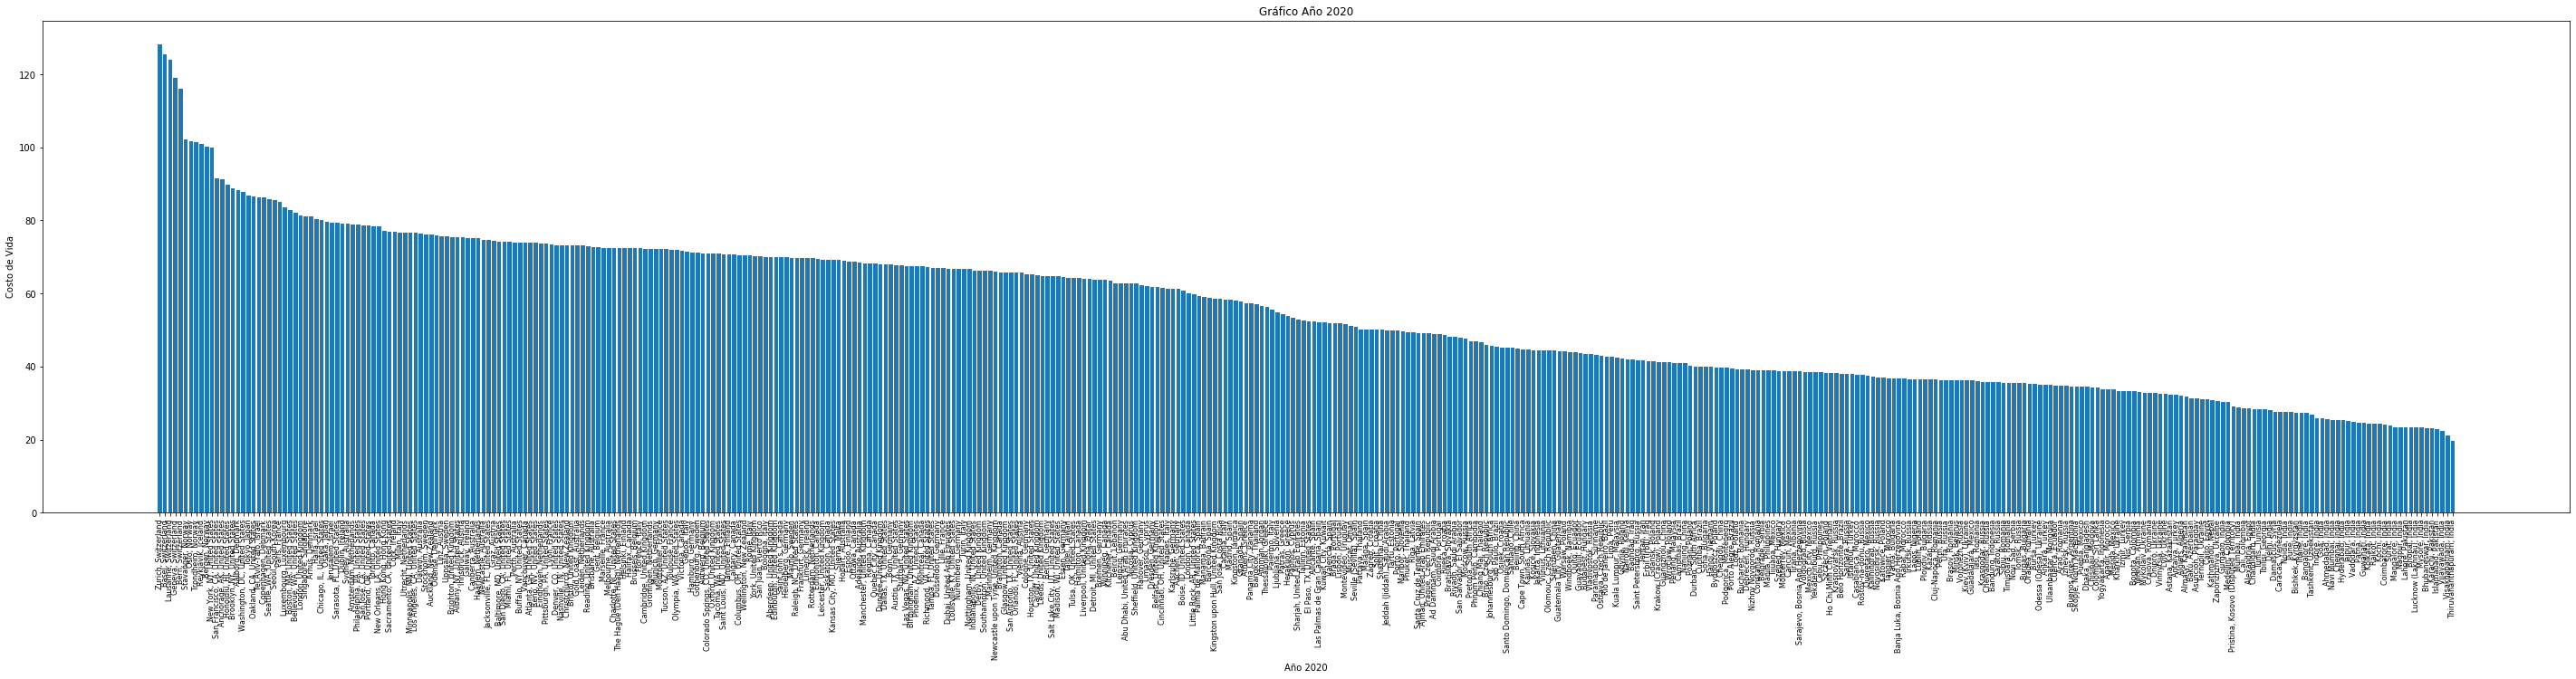

In [3]:
años=['2015', '2016', '2017', '2018', '2019', '2020']
for i in años:
    
    df1 = life_cost.query('year== @i')
    y = df1.loc[:,'cost_of_living_index']
    x = df1.loc[:,'city']
    fig = plt.figure(figsize=(50,10))
    plt.title('Gráfico Año '+str(i))
    plt.bar(x,y)
    plt.xlabel('Año '+ str(i))
    plt.xticks(x,rotation='vertical',size=8)
    plt.ylabel('Costo de Vida')
    plt.show()

De estos gráficos se puede obtener mas que nada los "pics" de los costos de vida sin renta de cada ciudad, pudiendo comparar los máximos de cada año. Además que están ordenados de mayor a menor, nos indica visualemnte como están los valores de ciertas ciudades respecto a otras.
Por ejemplo en el año 2015 Bermuda, Hamilton tuvo un índice de sobre 160 mientras que thiruvanantapuran, India, tuvo el índice más bajo con un valor cercano a 20. 
Otra información para extraer podría ser quien ha liderado los valores mas altos y bajos de estos indices.
Más allá de esa información visual no se obtiene de estos gráficos

### Ejercicio 1.3 ( pts)

Grafica el índice de restaurantes a través de los años para diez ciudades escogidas pseudo-aleatoriamente (variable `my_cities` de la celda siguiente) en un mismo gráfico. Recuerda escoger el tipo de gráfico adecuadamente.

¿Ves alguna relación? ¿Qué podrías decir del gráfico? ¿Por qué no graficar todas las ciudades en lugar de solo escoger algunas?

In [4]:
rol_seed = 201684022  # Escribe tu rol UTFSM sin número verificador
my_cities = life_cost["city"].drop_duplicates().sample(n=10, random_state=rol_seed).values
my_cities

array(['Izmir, Turkey', 'Memphis, TN, United States', 'Kuching, Malaysia',
       'Male, Maldives', 'Santa Barbara, CA, United States',
       'Plano, TX, United States', 'Istanbul, Turkey',
       'Alexandria, Egypt', 'Izhevsk, Russia', 'Busan, South Korea'],
      dtype=object)

In [5]:
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['year'],empty='none')

alt.Chart(life_cost[lambda df2: df2['city'].isin(my_cities)]).mark_line(interpolate='basis').encode(
    alt.X('year:O', title='Año'),
    alt.Y('restaurant_price_index:Q', title='Indice de precio de restaurantes'),
    alt.Color('city:N', title='ciudad'),
    tooltip='city:N'
).properties(
    title=alt.TitleParams(text='Variación de precios de restaurantes a traves de los años', anchor='middle'),
    height=600,
    width=250
)


alt.Chart(...)

Se puede observar que en algunas de las ciudades los valores de los indices de restaurantes tiende a decrecer como es el caso de Rusia, Egypto, etc; y en otros crece como es el caso de Santa Barbara en EE.UU o Memphis.
Este gráfico de líneas nos permite comparar valores entre un año y otro, como van variando estos indices respecto a cada país y también comparar los valores entre un país y otro.
Se puede observar que en algunas ciudades no existe medición de este índice.
No se grafican todas las ciudades dato que con una muestra de estas se pueden deducir a que tienden estas ciudades, paies respecto a los valores. 

### Ejercicio 1.4

Genera un mapa de calor tal que:

- El eje horizontal corresponda a cada uno de los índices.
- El eje vertical corresponda a cada una de las ciudades de `my_cities`.
- El color y valor en cada celda sea el promedio de los indicadores.
    - El valor de la celda debe tener solo dos decimales.

In [6]:
redable_index_names = {
    'cost_of_living_index': 'Costo de Vida',
    'rent_index': 'Alquiler',
    'cost_of_living_plus_rent_index': 'Costo de Vida + Alquiler',
    'groceries_index': 'Comestibles',
    'restaurant_price_index': 'Restaurantes',
    'local_purchasing_power_index': 'Poder Adquisitivo Local'
}

In [7]:
df4 = (life_cost[lambda df: df['city'].isin(my_cities)]
           .drop(['year','rank'], axis=1)
           .groupby('city')
           .agg('mean')
           .rename(columns=redable_index_names)
           .reset_index()
           .melt(id_vars=['city'])
           .round(2)
)
df4.head()

base = alt.Chart(df4).mark_rect().encode(
        x=alt.X('variable:N',title=''),
        y=alt.Y('city:N',title='')
).properties(
title=alt.TitleParams(text='Indices de costo de vida de cada ciudad por área')
)

heatmap = base.mark_rect().encode(
    color=alt.Color('value:Q')
).properties(
width=300,
height=300
)

text= base.mark_text().encode(text='value:Q')
heatmap + text


alt.LayerChart(...)

En este mapa de calor se nota muy facilmente las ciudades con mayores indices por área, como también los valores mas altos a nivel general. Estados Unidos lidera el ranking, dado que, solo observando se puede notar que tienen colores mucho mas oscuros en sus items.
Por otro lado, en Rusia, se uede obserbar que hay valores mucho mas bajos, de color mas claro, junto con Egipto. Se podria decir solo por los colores que tienen indices de costos de vida similares, mientras que en EEUU, Santa Barbara es en ciertos items muy distinta a otras ciudades incluso de su país.

### Ejercicio 1.5

Primero, agregar la columna `country` al dataframe `life_cost` a partir de la columna `city`. Luego, realizar un scatter plot donde:

- Datos correspondientes al año 2020.
- El eje horizontal corresponda a el Índice de Comestibles.
- El eje vertical corresponda a el Poder Adquisitivo Local.
- El color corresponda al país.
- Debe contener solo 20 países que son escogidos pseudo-aleatoriamente.
    - Para ellos deber agregar la columna `country` al dataframe `life_cost`.
    - Ejecutar la celda sub-siguiente para generar el _np.array_ `my_countries`.
- Se debe utilizar un esquema de color distinto (_color scheme_ o _colormap_), puesto que hay 20 categorías. 
    - En `altair` utilizar el esquema `category20`. [Más información aquí](https://altair-viz.github.io/user_guide/customization.html?highlight=color%20map#color-schemes).
    - En `matplotlib` utilizar el esquema `tab20`. [Más información aquí](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).    
- En caso que los puntos del scatter plot se vean muy pequeños en relación al gráfico debes aumentar su tamaño.

In [8]:
new = life_cost["city"].str.split(",", n = 1, expand = True)
new.head()
life_cost['country']=new[1]
life_cost['city']=new[0]
life_cost.head()

,year,rank,city,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index,country
0,2015,1,Hamilton,163.55,120.02,142.28,191.71,132.91,69.79,Bermuda
1,2015,2,Geneva,145.18,81.46,114.05,161.14,141.23,130.21,Switzerland
2,2015,3,Caracas,141.41,60.46,101.86,155.16,122.27,9.73,Venezuela
3,2015,4,Zurich,141.06,66.39,104.57,148.56,146.90,133.91,Switzerland
4,2015,5,Tromso,131.45,55.80,94.48,127.72,137.08,132.41,Norway


In [9]:
my_countries = life_cost.query("year == 2020")["country"].drop_duplicates().sample(n=20, random_state=rol_seed).values

In [10]:
alt.Chart(life_cost[lambda df: df['country'].isin(my_countries)]).mark_point(size=40).encode(
    x=alt.X('groceries_index:Q',title='Comestibles'),
    y=alt.Y('local_purchasing_power_index:Q',title='Poder Adquisitivo Local'),
    color=alt.Color('country:N', scale=alt.Scale(scheme='category20')),
    tooltip=[alt.Tooltip('country:O',title='País'),
             alt.Tooltip('city:O',title='ciudad'),
             alt.Tooltip('groceries_index:Q', title='Comestibles'),
             alt.Tooltip('local_purchasing_power_index:Q',title='Poder adquisitivo local')],
    shape='country'#con esto podremos diferenciar facilmente los países 
).properties(
    height=600,
    width=900,
    title=alt.TitleParams(text='Indice de poder aquisitivo local v/s Indice de comestibles')
).interactive()

alt.Chart(...)

¿Qué comentarios puedes entregar al comparar los países seleccionados?

Se puede ver que en países menos desarrollados los valoes son menores para comestibles pero que sus valoes de poder adquisitivo pueden ser muy altos o muy bajos (eso puede indicar altas tasas de desigualdad), mientras que en países mas desarrollados los valores son mas altos en comestibles pero repartido respecto al poder adquisitivo por lo que puede indicar un menor valor de desigualdad.

### Ejercicio 1.6

El siguiente ejercicio necesita de un conjunto de datos adicional, que relacione el país con el continente. A continuación se disponibiliza el dataframe `countries` con las columnas `country` y `continent`.

Agrega la columna `continent` al dataframe `life_cost` realizando un _merge_ con `countries`.

In [11]:
rename_countries_dict = {
    "Czechia": "Czech Republic",
    "Bosnia and Herzegovina": "Bosnia And Herzegovina",
    "Kosovo": "Kosovo (Disputed Territory)",
    "North Macedonia": "Macedonia",
    "Trinidad and Tobago": "Trinidad And Tobago"
}

countries = (
    pd.read_html("http://www.geonames.org/countries/", keep_default_na=False)[1]
    .rename(columns=lambda x: x.lower())
    .assign(country=lambda x: x["country"].replace(rename_countries_dict))
    .loc[:, ["country", "continent"]]
)
countries

,country,continent
0,Andorra,EU
1,United Arab Emirates,AS
2,Afghanistan,AS
3,Antigua and Barbuda,NA
4,Anguilla,NA
5,Albania,EU
6,Armenia,AS
7,Netherlands Antilles,NA
8,Angola,AF
9,Antarctica,AN


In [12]:
life_cost=pd.merge(life_cost, countries, how='inner', on='country')
life_cost.head()

,year,rank,city,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index,country,continent


A continuación genera un gráfico que posea 36 subgráficos, estos se generan realizando todas las permutaciones (con repetición) de dos índices. 

Cada sub-gráfico:
- Debe corresponder solo al año 2020.
- Debe ser un scatter plot.
- Los ejes horizontal y vertical corresponden al par de índices de la permutación
- El color de cada punto se corresponde al continente.
- La opacidad de cada punto debe ser `0.3`.

In [13]:
alt.Chart(life_cost.rename(columns=redable_index_names)).mark_circle(opacity=0.3).encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    alt.Color('continent', title='Continente',type='nominal')
).properties(
    width=140,
    height=140
).repeat(
    row=list(redable_index_names.values()),
    column=list(redable_index_names.values())
)

C:\Users\Public\Documents\Anaconda\lib\site-packages\altair\utils\core.py:109: UserWarning: I don't know how to infer vegalite type from 'empty'.  Defaulting to nominal.
  "Defaulting to nominal.".format(typ))


alt.RepeatChart(...)

## 2. Películas

Este ejercicio utilizará el dataset de películas que viene pre-cargado en `vega_datasets`. Es intereasnte pues posee columnas de distintos tipos y una cantidad relativamente decente de registros.

In [14]:
#data.movies?

In [15]:
movies_raw = data.movies()
movies_raw.head()

,Creative_Type,Director,Distributor,IMDB_Rating,IMDB_Votes,MPAA_Rating,Major_Genre,Production_Budget,Release_Date,Rotten_Tomatoes_Rating,Running_Time_min,Source,Title,US_DVD_Sales,US_Gross,Worldwide_Gross
0,None,None,Gramercy,6.1,1071.0,R,None,8000000.0,Jun 12 1998,NaN,NaN,None,The Land Girls,NaN,146083.0,146083.0
1,None,None,Strand,6.9,207.0,R,Drama,300000.0,Aug 07 1998,NaN,NaN,None,"First Love, Last Rites",NaN,10876.0,10876.0
2,None,None,Lionsgate,6.8,865.0,None,Comedy,250000.0,Aug 28 1998,NaN,NaN,None,I Married a Strange Person,NaN,203134.0,203134.0
3,None,None,Fine Line,NaN,NaN,None,Comedy,300000.0,Sep 11 1998,13.0,NaN,None,Let's Talk About Sex,NaN,373615.0,373615.0
4,Contemporary Fiction,None,Trimark,3.4,165.0,R,Drama,1000000.0,Oct 09 1998,62.0,NaN,Original Screenplay,Slam,NaN,1009819.0,1087521.0


### Ejercicio 2.1

Pre-procesamiento:

Crea un dataframe llamado `movies` tal que sea igual a `movies_raw` salvo que la columna `Release_Date` debes convertrla a tipo `datetime` (recuerda utilizar `pd.to_datetime`).

Este conjunto de datos posee algunos errores, a medida que vayas avanzando en el desarrollo de estas visualizaciones te irás dando cuenta de ellos y __debes solucionarlos!__.

A modo de ejemplo, hay películas que tienen fechas de estreno incorrectas, a cualquiera que sea del año 2020 en adelante hay que restarle 100 años. Ver _King Kong (1933)_ y su fecha de estreno el año 2033.

In [16]:
## Arreglar estrenos a partir del año 2020
año_2020= pd.to_datetime('2020-01-01')
movies = movies_raw.apply(lambda x: pd.to_datetime(x) if x.name=='Release_Date'
                         else x)
movies['Release_Date'] = movies['Release_Date'].apply(lambda y: y-pd.DateOffset(years=100)
                                                      if y>año_2020 else y)
                                                      

In [17]:
#movies['Release_Date'][1]
año_2020

Timestamp('2020-01-01 00:00:00')

In [18]:
## Generar dataframe movies a partir de movies_raw
movies[lambda i: i['Release_Date']> año_2020] #se corrobora que no hay películas pasadas el 2020

,Creative_Type,Director,Distributor,IMDB_Rating,IMDB_Votes,MPAA_Rating,Major_Genre,Production_Budget,Release_Date,Rotten_Tomatoes_Rating,Running_Time_min,Source,Title,US_DVD_Sales,US_Gross,Worldwide_Gross


Rellena los registros nulos de la columna `Major_Genre` con el valor `Unknown`.

In [19]:
movies['Major_Genre'] =movies['Major_Genre'].fillna('Unknown')

Para que todos los gráficos de aquí en adelante funcionen bien vamos a eliminar los registros/filas/películas que tengan algún elemento nulo dentro de las siguientes columnas:

- `US_Gross`
- `Worldwide_Gross`
- `Production_Budget`
- `Release_Date`
- `IMDB_Rating`

In [20]:
movies = movies.dropna(subset=['US_Gross','Worldwide_Gross','Production_Budget','Release_Date','IMDB_Rating']) #elimina cualquier película que tenga un valor nulo en sus columnas 
movies.head()

,Creative_Type,Director,Distributor,IMDB_Rating,IMDB_Votes,MPAA_Rating,Major_Genre,Production_Budget,Release_Date,Rotten_Tomatoes_Rating,Running_Time_min,Source,Title,US_DVD_Sales,US_Gross,Worldwide_Gross
0,None,None,Gramercy,6.1,1071.0,R,Unknown,8000000.0,1998-06-12,NaN,NaN,None,The Land Girls,NaN,146083.0,146083.0
1,None,None,Strand,6.9,207.0,R,Drama,300000.0,1998-08-07,NaN,NaN,None,"First Love, Last Rites",NaN,10876.0,10876.0
2,None,None,Lionsgate,6.8,865.0,None,Comedy,250000.0,1998-08-28,NaN,NaN,None,I Married a Strange Person,NaN,203134.0,203134.0
4,Contemporary Fiction,None,Trimark,3.4,165.0,R,Drama,1000000.0,1998-10-09,62.0,NaN,Original Screenplay,Slam,NaN,1009819.0,1087521.0
6,None,Christopher Nolan,Zeitgeist,7.7,15133.0,R,Unknown,6000.0,1999-04-04,NaN,NaN,None,Following,NaN,44705.0,44705.0


### Ejercicio 2.2

Define la función `movies_chart` tal que: 

- Los argumentos sean `year`, `imdb_rating`, `genre`, `budget` y `ww_gross` con valor por defecto `None`. 
    * Cada uno de estos argumentos es una tupla de dos elementos, que corresponden a un valor mínimo y máximo, salvo `genre` que es una tupla de `strings`. 
- Se define el dataframe `data` que es una copia del dataframe `movies`.
- Luego se debe filtrar el dataframe `data` de la siguiente forma:
    * `year` filtra la columna `Release_Date` tal que $year[0] \leq year(Release_Date) \leq year[1]$.
    * `imdb_rating` filtra la columna `IMDB_Rating` tal que $imdb_rating[0] \leq IMDB_Rating \leq imdb_rating[1]$.
    * `genre` filtra la columna `Major_Genre` tal que $genre[0] \in Major\_Genre$.
    * `budget` filtra la columna `Production_Budget` tal que $budget[0] \leq Production_Budget \leq budget[1]$.
    * `ww_gross` filtra la columna `Worldwide_Gross` tal que $ww_gross[0] \leq Worldwide_Gross \leq ww_gross[1]$.
- Se define la variables `chart` que corresponde a un `alt.Chart` que debe:
    * Ser un _scatter plot_ con opacidad `0.4`.
    * El eje horizontal corresponde al presupuesto de producción.
    * El eje vertical corresponde a lo recaudado mundialmente.
    * El color se corresponde con el género principal de la película.
    * El tamaño es proporcional al rating de IMDB.
    * Cada punto debe mostrar un tooltip con:
        - Título de la película.
        - Fecha de lanzamiento.
        - Director.
        - Fuente.
        - Distribuidor.
        - Presupuesto de producción.
        - Recaudación mundial.
        - Género principal.
        - Rating IMDB.
    * El gráfico debe ser interactivo.
- Finalmente, hacer un `display` del gráfico `chart`.
- Retorna `None`.

In [21]:
def movies_chart(year=None, imdb_rating=None, genre=None, budget=None, ww_gross=None):
 
    data = movies.copy()
    
    # Year
    if year is not None:
        data = data.loc[lambda i: i['Release_Date'].between(pd.to_datetime(str(year[0])),pd.to_datetime(str(year[1])))==True]#nos entrega valores entre series
        
    # IMDB
    if imdb_rating is not None:
        data = data.loc[lambda i: i['IMDB_Rating'].between(imdb_rating[0],imdb_rating[1])==True]
          
    # Genre
    if genre is not None:
        data = data.loc[lambda df: df['Major_Genre'].isin(genre)]
        
    # Budget
    if budget is not None:
        data = data.loc[lambda i: i['Production_Budget'].between(budget[0],budget[1])==True]
        
    # Worldwide Gross
    if ww_gross is not None:
        data = data.loc[lambda i: i['Worldwide_Gross'].between(ww_gross[0],ww_gross[1]) ==True]
    
    ## Chart
    chart = (
        alt.Chart(
            data
        ).mark_point(opacity=0.4)
    ).encode(
    x=alt.X('Production_Budget:Q',title='Presupuesto de Producción'),
    y=alt.Y('Worldwide_gross:Q',title='Recaudado Mundialmente'),
    color=alt.Color('Major_Genre:N',title='Género Principal'),
    size=alt.Size('IMDB_Rating:Q'),
    tooltip=[  alt.Tooltip('Title:N', title='Titulo'),
               alt.Tooltip('Release_Date', type='temporal', title='Fecha de Lanzamiento'),
               alt.Tooltip('Director:N', title='Director'),
               alt.Tooltip('Source:N', title='Fuente'),
               alt.Tooltip('Distributor:N', title='Distribuidor'),
               alt.Tooltip('Production_Budget:Q', title='Presupuesto de Produccion'),
               alt.Tooltip('Worldwide_Gross:Q', title='Recaudación Mundial'),
               alt.Tooltip('Major_Genre:N', title='Genero Principal'),
               alt.Tooltip('IMDB_Rating:Q', title='Rating IMDB')]
    ).interactive()

    display(chart)
    return None

In [22]:
movies_chart()

alt.Chart(...)

### Ejercicio 2.3

Generar widgets para cada uno de los argumentos de la función `movies_chart`, los nombres sugeridos son:

- `year_widget` para el argumente `year`, debe ser un `widget.IntRangeSlider`, por defecto deben venir selecionados el mínimo y máximo; el paso debe ser de 1 unidad.
- `imdb_widget` para el argumente `imdb`, debe ser un `widget.FloatRangeSlider`, por defecto deben venir selecionados el mínimo y máximo; el paso debe ser de 0.1 unidad.
- `genre_widget` para el argumente `genre`, debe ser un `widget.SelectMultiple`, por defecto deben venir selecionados todos los géneros..
- `budget_widget` para el argumente `budget`, debe ser un `widget.IntRangeSlider`, por defecto deben venir selecionados el mínimo y máximo; el paso debe ser de 1 unidad.
- `ww_gross_widget` para el argumente `ww_gross`, debe ser un `widget.IntRangeSlider`, por defecto deben venir selecionados el mínimo y máximo; el paso debe ser de 1 unidad.

Todo widget debe tener un valor adecuado para el argumento `description` y configurar el argumento `continuous_update = False`.

In [23]:
min=int(movies['Production_Budget'].min())
max=int(movies['Production_Budget'].max())
min

218

In [24]:
year_widget = widgets.IntRangeSlider(
    min=int(movies['Release_Date'].min().year),
    max=int(movies['Release_Date'].max().year),
    value=(min,max),
    continuous_update = False,
    step=1
)

imdb_widget = widgets.FloatRangeSlider(
    min=movies['IMDB_Rating'].min(),
    max=movies['IMDB_Rating'].max(),
    value=(min, max),
    continuous_update = False,
    step=0.1
)

genre_widget = widgets.SelectMultiple(
    options=movies['Major_Genre'].unique().tolist(),
    value=movies['Major_Genre'].unique().tolist(),
    continuous_update = False
)

budget_widget = widgets.IntRangeSlider(
    min=int(movies['Production_Budget'].min()),
    max=int(movies['Production_Budget'].max()),
    value=(min, max),
    continuous_update = False,
    step=1
)

ww_gross_widget = widgets.IntRangeSlider(
    min=int(movies['Worldwide_Gross'].min()),
    max=int(movies['Worldwide_Gross'].max()),
    value=(min, max),
    continuous_update = False,
    step=1
)

Finalmente, haciendo uso de `interactive`, la función `movies_chart` y todos los widgets es posible crear un _dashboard_ interactivo con los datos de las películas.

Respira profundo y explora tu creación!

In [25]:
movies_dashboard = interactive(
    movies_chart,
    year=year_widget,
    imdb_rating=imdb_widget,
    genre=genre_widget,
    budget=budget_widget,
    ww_gross=ww_gross_widget
)
movies_dashboard

alt.Chart(...)